# Introduction to Numpy/PyTorch

A few links:
- https://github.com/nicknytko/cse-pytorch-workshop
- PyTorch tutorials: https://pytorch.org/tutorials/
- PyTorch manual: https://pytorch.org/docs/stable/index.html
- PyTorch paper: https://openreview.net/forum?id=BJJsrmfCZ
- Calculus on computational graphs: http://colah.github.io/posts/2015-08-Backprop/
- Einstein summation in PyTorch: https://rockt.github.io/2018/04/30/einsum

Pytorch
- 🔥 NumPy-like -- how is it different?
- 🔜 Computes derivatives using a (dynamic) computation graph -- what is this?
- ⏭️ Library of neural nets -- how will we use these?
- ⏭️ Library of optimizers -- why is this important?
- ⏭️ Ability to use GPUs -- where/how?

# Let's get started!

In [1]:
import torch
import numpy as np
import random, datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Numpy

## Scalar vs. Matrix vs. Tensor

<img src="02_tensors.jpeg" alt="Drawing" style="width: 500px;"/>

Credits: [https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/](https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/)

* Numpy arrays and PyTorch tensors are all "tensors".

* Each tensor has a set of dimensions:
  * *Scalars* are 0-dimensional tensors.
  * *Vectors* are 1-dimensional tensors.
  * *Matrices* are 2-dimensional tensors.
  * We can have n-dimensional tensors the same way.

## 1. Array Attributes

Let's say `arr` is a numpy array. These are some key attributes:

* **Shape**: `arr.shape` denotes the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. 


* **Size**: `arr.size` denotes the total number of elements of the array.


* **Data-type**: `arr.dtype` denotes the type of the elements in the array. Some examples are `int32`, `int64`, `float32`, `float64`, `bool` and so on.


* **Number of Dimensions**: `arr.ndim` denotes the number of dimensions in the array.


In other words, we have 
```
arr.size == np.prod(arr.shape)
arr.ndim == len(arr.shape)
```

In [2]:
a = np.array([[1, 2, 3], 
              [5, 6, 7]])

In [3]:
# The number of dimensions in `a`
a.ndim

2

In [4]:
# Let's check out the shape of `a`
a.shape

(2, 3)

In [5]:
# Let's look at what data-type numpy used for storing `a`
a.dtype

dtype('int64')

**Question**: Why did numpy assign a data type of `int64` as opposed to `float64`?

In [6]:
# Let's select the first entry in `a`
b = a[0, 0]
b.shape

()

In [7]:
b.size

1

**Question**: What does a shape of `()` even mean?

In [8]:
# Let's create 
c = np.array([1])
c.shape

(1,)

**Question**: Is `c` different from `b`? 
  * If yes, aren't they both scalars?
  * If no, then why do they have different shapes?

In [9]:
a = np.array(1)
b = np.array([1])
c = np.array([[1]])
d = np.array([[[1]]])

print(f'a.shape ==> {a.shape}')
print(f'b.shape ==> {b.shape}')
print(f'c.shape ==> {c.shape}')
print(f'd.shape ==> {d.shape}')

a.shape ==> ()
b.shape ==> (1,)
c.shape ==> (1, 1)
d.shape ==> (1, 1, 1)


## 2. Creating Numpy Arrays

### Creating an all zeros array

In [10]:
z = np.zeros((2,3,4), dtype=np.float32)
z

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [11]:
z.shape

(2, 3, 4)

### Creating an all ones array

In [12]:
o = np.ones((2,3,4), dtype=np.float32)
o

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

### Creating a range of values

In [13]:
r = np.arange(8)
r

array([0, 1, 2, 3, 4, 5, 6, 7])

### Creating a linear spacing of values

In [14]:
l = np.linspace(0, 100, 6)
l

array([  0.,  20.,  40.,  60.,  80., 100.])

### Creating an identity matrix

In [15]:
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Creating a diagonal matrix

In [16]:
d = np.diag([1,3,4])
d

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

### Creating an array filled with a value

In [17]:
# Creating a full array
f = np.full((2,3,4), 9, dtype=np.float32)
f

array([[[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]],

       [[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]]], dtype=float32)

### Concatenating arrays

In [18]:
a = np.zeros((1, 2, 3))
b = np.ones((1, 2, 3))

c = np.concatenate([a, b], axis=0)
d = np.concatenate([a, b], axis=1)
e = np.concatenate([a, b, b], axis=2)

print(f'a.shape == {a.shape}')
print(f'b.shape == {b.shape}')
print(f'np.concatenate([a, b], axis=0) --> shape == {c.shape}')
print(f'np.concatenate([a, b], axis=1) --> shape == {d.shape}')
print(f'np.concatenate([a, b], axis=2) --> shape == {e.shape}')

a.shape == (1, 2, 3)
b.shape == (1, 2, 3)
np.concatenate([a, b], axis=0) --> shape == (2, 2, 3)
np.concatenate([a, b], axis=1) --> shape == (1, 4, 3)
np.concatenate([a, b], axis=2) --> shape == (1, 2, 9)


### Creating randomized arrays

In [19]:
# Sampling from the normal distribution
norm = np.random.randn(2, 3, 4)
norm

array([[[ 0.23065762,  0.02217084, -0.10121372,  0.99234984],
        [-0.95492955,  2.31058934,  0.07928594, -1.46541922],
        [-1.69807453, -0.60497951, -0.74931366,  0.30397931]],

       [[ 0.72009302,  0.6301061 , -0.25735345,  0.47670691],
        [ 0.91241812,  1.32191125,  2.15814745,  2.01233638],
        [ 0.11869959,  0.70696055, -1.15444165,  0.55388798]]])

In [20]:
# Sampling from the uniform distribution over [0, 1]
unif = np.random.rand(2, 3, 4)
unif

array([[[0.1802197 , 0.66095016, 0.57130027, 0.39841855],
        [0.63821205, 0.73945454, 0.30870294, 0.15637208],
        [0.32301719, 0.23430333, 0.47883175, 0.18425931]],

       [[0.7645947 , 0.48027599, 0.88369374, 0.09526258],
        [0.24441635, 0.27554533, 0.79464836, 0.12353291],
        [0.30492051, 0.78980064, 0.99182166, 0.66124406]]])

You can find a list of distributions to sample from at https://numpy.org/doc/stable/reference/random/legacy.html

## 3. Array Operations

* The underlying data for all arrays is stored sequentially in the memory.
* However, we can *view* the same data differently.
* Reshaping does just that!

<img src="03_reshape.webp" alt="Drawing" style="width: 500px;"/>

Credits: https://geekflare.com/numpy-reshape-arrays-in-python/

In [21]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c = a.reshape(3, 2, 2)
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

All three variables share the same underlying data

In [24]:
print(f'The memory location of a.data: {hex(a.__array_interface__["data"][0])}')
print(f'The memory location of b.data: {hex(b.__array_interface__["data"][0])}')
print(f'The memory location of c.data: {hex(c.__array_interface__["data"][0])}')

The memory location of a.data: 0x600002d7d6e0
The memory location of b.data: 0x600002d7d6e0
The memory location of c.data: 0x600002d7d6e0


## Reshaping is not the same as transposing!

In [25]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
b.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [27]:
b.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### Slicing an array

In [28]:
a = np.linspace(0, 100, 11)
a

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [29]:
a[3:7]

array([30., 40., 50., 60.])

In [30]:
# You can do this in multiple dimensions
b = np.arange(30).reshape(5, 6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [31]:
b[0:4:2, 0:6:2]

array([[ 0,  2,  4],
       [12, 14, 16]])

## Broadcasting

It's just "virtual stretching" across dummy dimensions of size one:

<img src="08_bcast.png" alt="Drawing" style="width: 500px;"/>

Credits: https://numpy.org/doc/stable/user/basics.broadcasting.html

In [32]:
a = np.array([1, 2, 3])
b = np.array(2)
c = a * b
c

array([2, 4, 6])

<img src="09_bcast.png" alt="Drawing" style="width: 500px;"/>

In [33]:
a = np.array([[1, 3, 4, 5],
              [2, 7, 3, 1]])

b = np.array([[0, 2, 0, 2]])

c = a + b
c

array([[1, 5, 4, 7],
       [2, 9, 3, 3]])

### Some elementwise functions

In [34]:
# Raising to the power of 2
a ** 2 

array([[ 1,  9, 16, 25],
       [ 4, 49,  9,  1]])

In [35]:
# Exponentiating
np.exp(a)

array([[   2.71828183,   20.08553692,   54.59815003,  148.4131591 ],
       [   7.3890561 , 1096.63315843,   20.08553692,    2.71828183]])

In [36]:
# Logarithms
np.log(a)

array([[0.        , 1.09861229, 1.38629436, 1.60943791],
       [0.69314718, 1.94591015, 1.09861229, 0.        ]])

In [37]:
# trigonometry functions 
np.sin(a)

array([[ 0.84147098,  0.14112001, -0.7568025 , -0.95892427],
       [ 0.90929743,  0.6569866 ,  0.14112001,  0.84147098]])

In [38]:
# Matrix multiplications
b = a @ a.transpose()
b

array([[51, 40],
       [40, 63]])

In [39]:
# Matrix inversion
np.linalg.inv(b)

array([[ 0.03905766, -0.02479851],
       [-0.02479851,  0.0316181 ]])

In [40]:
# Singular Value Decomposition
u, s, v = np.linalg.svd(a)
s

array([9.87154987, 4.06847676])

### Reduction Fucntions

First, you need to learn how the `axis` argument works!

<img src="05_axis.png" alt="Drawing" style="width: 500px;"/>

Credit: https://predictivehacks.com/tips-about-numpy-arrays/

One of the reduction functions is `np.sum`. You can apply it across any dimensions.

<table><tr>
<td> <img src="06_sum0.png" width="600"/> </td>
<td> <img src="07_sum1.png" width="420"/>  </td>
</tr></table>

Credits: https://www.sharpsightlabs.com/blog/numpy-sum/

Errata: The sum values are incorrect in the left figure

In [41]:
a = np.array([[1, 3, 4, 5],
              [2, 7, 3, 1]])

Another reduction function is the mean

In [42]:
np.mean(a, axis=0)

array([1.5, 5. , 3.5, 3. ])

Another reduction function is the standard deviation

In [43]:
np.std(a, axis=1)

array([1.47901995, 2.27760839])

Another reduction function is the standard deviation

In [44]:
np.std(a, axis=1)

array([1.47901995, 2.27760839])

You can also take the min and max

In [45]:
a.min(axis=0)

array([1, 3, 3, 1])

You can also figure out where the min and max are placed!

In [46]:
a.argmax(axis=1)

array([3, 1])

### Case Study

Images are arrays of intensity values.

<img src="04_parrot.jpg" alt="Drawing" style="width: 500px;"/>

In [47]:
img_arr = plt.imread('04_parrot.jpg')

# The image dimensions
img_arr.shape

(700, 900, 3)

**Question**: What do the shape dimensions mean?
* The first dimension corresponds to the height of the image (700 pixels).
* The second dimension corresponds to the width of the image (900 pixels).
* The third dimension corresponds to the color channels (red, green, and blue).

In [48]:
height, widht, channels = img_arr.shape

In [49]:
img_arr.dtype

dtype('uint8')

In [50]:
img_arr.min(), img_arr.max()

(0, 255)

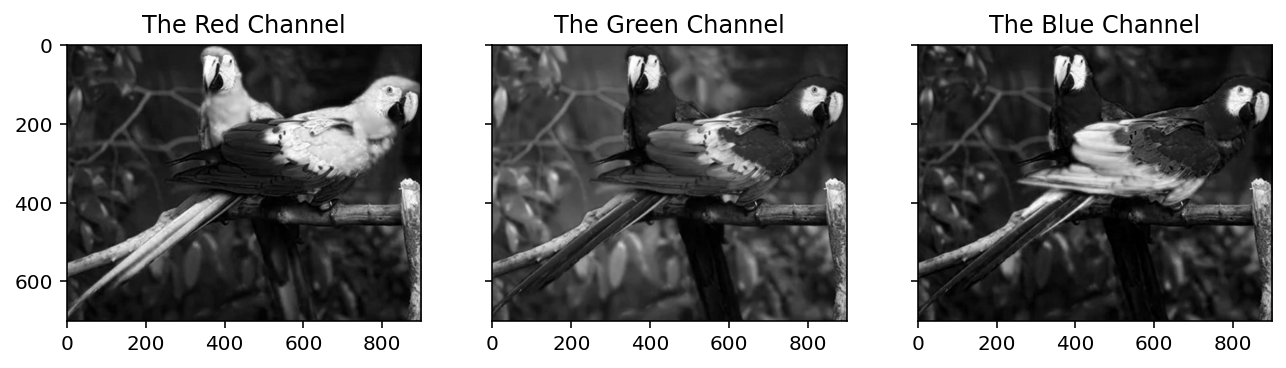

In [51]:
# The red channel
red_channel = img_arr[:, :, 0]
assert red_channel.shape == (700, 900)

# The green channel
green_channel = img_arr[:, :, 1]
assert green_channel.shape == (700, 900)

# The blue channel
blue_channel = img_arr[:, :, 2]
assert blue_channel.shape == (700, 900)


fig, axes = plt.subplots(1, 3, dpi=144, figsize=(3.6*3, 2.8), sharex=True, sharey=True)

ax = axes[0]
ax.imshow(red_channel, cmap='gray')
ax.set_title('The Red Channel')

ax = axes[1]
ax.imshow(green_channel, cmap='gray')
ax.set_title('The Green Channel')

ax = axes[2]
ax.imshow(blue_channel, cmap='gray')
ax.set_title('The Blue Channel');

Let's remove the green channel for fun!

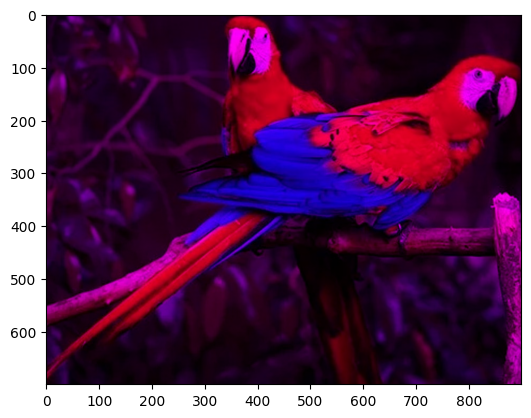

In [52]:
img_arr2 = img_arr.copy()
img_arr2[:, :, 1] = 0

plt.imshow(img_arr2);

The linear luminance of a pixel can be computed as

$$ Y = 0.2126 R + 0.7152 G + 0.0722 B $$

<font color=red>Challenge</font>: Take this colored image, and turn it into a gray-scaled image. Do this in four different way.

**Approach 1**: Take a manual summation

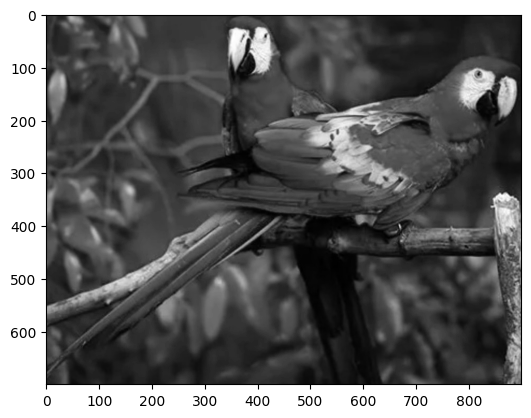

In [53]:
gray1 = 0.2126 * red_channel + 0.7152 * green_channel + 0.0722 * blue_channel
plt.imshow(gray1, cmap='gray');

**Approach 2**: Broadcast-multiply by weights, and then take a summation!

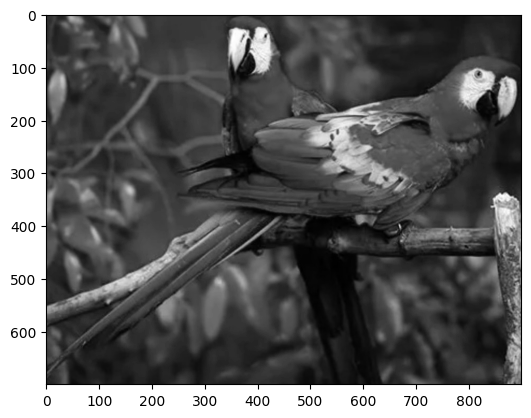

In [54]:
# TODO: implement approach 2
img_arr = plt.imread('04_parrot.jpg')
red_channel = img_arr[:, :, 0]
green_channel = img_arr[:, :, 1]
blue_channel = img_arr[:, :, 2]

weights = np.array([0.2126, 0.7152, 0.0722])
gray2 = np.dot(img_arr[...,:3], weights)
plt.imshow(gray2, cmap='gray')
plt.show()

**Approach 3**: Do it with matrix multiplication!

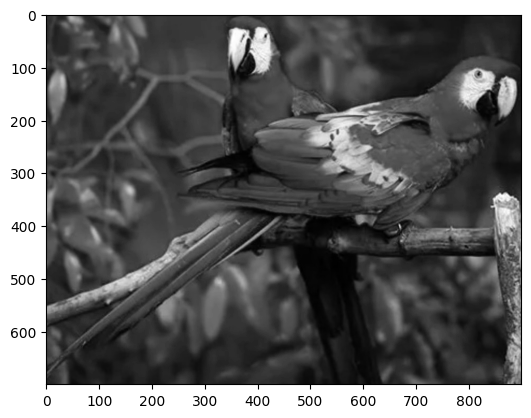

In [55]:
# TODO: implement approach 3

gray3 = np.matmul(img_arr[...,:3], weights)
plt.imshow(gray3, cmap='gray')
plt.show()

**Approach 4**: Do it with einstein sums!

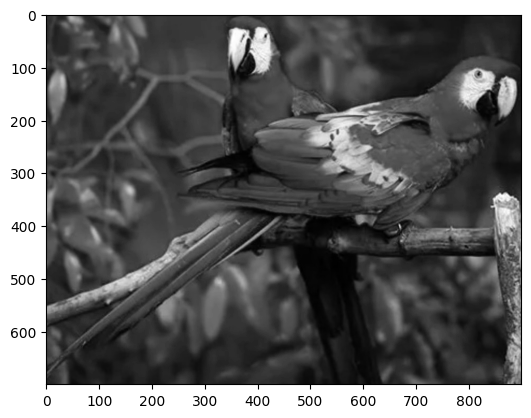

In [56]:
# TODO: implement approach 4
gray4 = np.einsum('ijk,k->ij', img_arr[...,:3], weights)
plt.imshow(gray4, cmap='gray')
plt.show()

<font color=red>Challenge</font>: Replace each pixel with the average of its neighbors. Do not use convolutions.

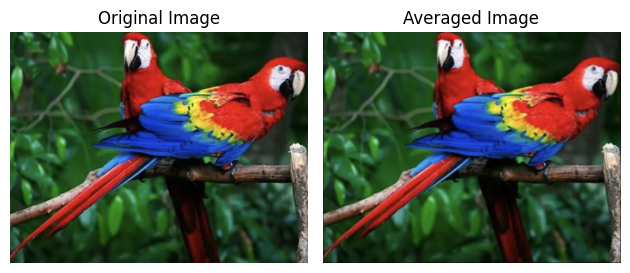

In [57]:
# TODO: implement this challenge

import numpy as np
import matplotlib.pyplot as plt


img_arr = plt.imread('04_parrot.jpg')

# Define the window size for averaging (e.g., 3x3 window)
window_size = 3

# Create a new image
averaged_image = np.zeros_like(img_arr)

# Iterate through the image pixels and replace with the average of neighbors
for x in range(window_size // 2, img_arr.shape[0] - window_size // 2):
    for y in range(window_size // 2, img_arr.shape[1] - window_size // 2):
        for c in range(averaged_image.shape[2]):
            neighbors = img_arr[x - window_size // 2:x + window_size // 2 + 1,
                                y - window_size // 2:y + window_size // 2 + 1, c]
            averaged_image[x, y, c] = np.mean(neighbors)


plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(averaged_image)
plt.title('Averaged Image')
plt.axis('off')

plt.tight_layout()
plt.show()

<font color=red>Challenge</font>: This is a 700 by 900 pixel image:

* Divide it into 7 by 9 grids.
* In each grid, find the pixel with maximum luminance.
* Print the **colored max-luminance** image.
* You can only use array operations (i.e., no loops/lists/etc.)

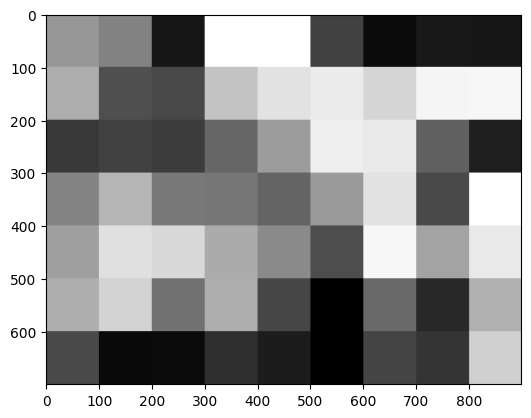

In [58]:
# TODO: implement this challenge
h, w = gray1.shape
sub_h, sub_w = h // 7, w // 9

reshaped = gray1.reshape(7, sub_h, 9, sub_w)
max_luminance = reshaped.max(axis=(1,3))


max_img = np.repeat(np.repeat(max_luminance, sub_h, axis=0), sub_w, axis=1)
plt.imshow(max_img, cmap='gray')
plt.show()

<font color=red>Challenge</font>: Let's say you have an $N\times D$ data matrix and a bunch of labels $y$. You have $C$ classes in your data.
    
Find the data mean within each class. You can only use numpy operations.

In [59]:
N = 100
D = 8
C = 10

np.random.seed(12345)
X = np.random.randn(N, D)
assert X.shape == (N, D)
Y = np.random.randint(0, C, N)
assert Y.shape == (N,)

In [60]:
# TODO: implement this challenge

import numpy as np


unique_classes = np.unique(Y)


X_mean = np.zeros((len(unique_classes), X.shape[1]))

# Iterate over each unique class label
for i, class_label in enumerate(unique_classes):
   
    class_data = X[Y == class_label]
    
   
    class_mean = np.mean(class_data, axis=0)
    
    
    X_mean[i] = class_mean

print(X_mean)

[[ 0.19567428  0.09357463  0.57269824 -0.00163779 -0.24052048 -0.09947792
  -0.67918995 -0.80903979]
 [-0.08312662  0.17758474  0.08831717 -0.25794646 -0.12689232 -0.39598923
  -0.01991459  0.51240232]
 [ 0.44384962  0.48535851  0.00706221  0.17432556  0.04869878  0.10731768
  -0.31851399  0.3194932 ]
 [-0.24203431  0.13162678  0.63259124 -0.77417844 -0.54404245  0.44038989
   0.11625256  0.28378913]
 [-0.0557919  -0.06013906 -0.71413883  0.21113392 -0.02650542  0.52004882
   0.23564077  0.30166433]
 [-0.12004767 -0.55674487 -0.43568148  0.029228    0.35728765  0.10181334
  -0.12394546  0.21727235]
 [-0.44145551 -0.30353433  0.33890844 -0.48943767  0.50979905 -0.05505596
   0.46410527  0.30539076]
 [ 0.01968397  0.1136857   0.65167131  0.35435204 -0.45667171 -0.14955894
  -0.36684724  0.10912459]
 [-0.40218841  0.11274615 -0.15110982 -0.43685238 -0.06668889  0.25474659
  -0.15950105  0.0482076 ]
 [ 0.10187366  0.09608878  0.36751535 -0.37591602 -0.14133345 -0.29572198
  -0.16062947 -0.

# PyTorch <-> NumPy

PyTorch executes immediately ("eager") versus delayed or lazy execution in TensorFlow.

Tensors are a generalization of a matrix and a vector.  See Einstein notation above!

PyTorch is very picky about datatypes, and defaults to single precision (NumPy defaults to double).

In [61]:
x = torch.tensor([[1.0,2.0,3.0],[4,5,6]])
print(x.dtype)
print(x)

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])


***
<font color=red>Challenge</font>: force `x` to be `float64`
***

In [62]:
x = torch.tensor([[1.0,2.0,3.0],[4,5,6]], dtype=torch.float64)
print(x.dtype)
print(x)

torch.float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


Let's look at a few numpy conversions and numpy-like operations:

In [63]:
x = np.random.rand(3)

y = torch.tensor(x)

z = torch.from_numpy(x)

In [64]:
x[1] = 88
print(x)
print(y)
print(z)

[ 0.20289255 88.          0.71354503]
tensor([0.2029, 0.1815, 0.7135], dtype=torch.float64)
tensor([ 0.2029, 88.0000,  0.7135], dtype=torch.float64)


Notice that `from_numpy()` will create a tensor view of the *same* mameory.  From the docs:
```
Modifications to the tensor will be reflected in the :attr:`ndarray` and vice versa.
```

Operations...

In [65]:
A = torch.tensor([[1.0, 2], [3, 4]])
v = torch.tensor([1.2, 3.4])

A @ v

tensor([ 8.0000, 17.2000])

***
<font color=red>Challenge</font>: write the matvec operation `A @ v` in `.einsum()`
***

In [66]:
A = torch.tensor([[1.0, 2], [3, 4]])
v = torch.tensor([1.2, 3.4])
result = torch.einsum('ij,j->i', A, v)
print(result)

tensor([ 8.0000, 17.2000])
